### Cocktail/Drink Recommendation

### Get data
1) Pull data from cocktail database API.   
API (https://www.thecocktaildb.com/api.php)    
     
2) I also created a dataset myself which is a summary the ingredients in big category a cocktail needs.

In [3]:
# import package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import json

import gower
from sklearn.preprocessing import scale,StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
def cocktail(letter):
    url = "https://www.thecocktaildb.com/api/json/v1/1/search.php?f="+letter
    resp = requests.request("GET",url)
    json_data = json.loads(resp.text)
    return json_data
cocktail_a = cocktail('c')

df = pd.DataFrame({'DrinkID':[],'DrinkName':[],'Category':[],'Ingredient1':[],'Ingredient2':[],'Ingredient3':[],
                  'Ingredient4':[],'Ingredient5':[],'Ingredient6':[],'Ingredient7':[],'Ingredient8':[],'Ingredient9':[],
                  'Ingredient10':[],'Ingredient11':[],'Ingredient12':[],
                  'Ingredient13':[],'Ingredient14':[],'Ingredient15':[],'Measure1':[],'Measure2':[],'Measure3':[],
                  'Measure4':[],'Measure5':[],'Measure6':[],'Measure7':[],'Measure8':[],'Measure9':[],
                  'Measure10':[],'Measure11':[],'Measure12':[],
                  'Measure13':[],'Measure14':[],'Measure15':[],
                  'Glass':[],'Instructions':[]})

for i in range(97,123):
    json_data = cocktail(chr(i))
    try:
        for drink in json_data['drinks']:
            DrinkID = drink['idDrink']
            DrinkName = drink['strDrink']
            Category = drink['strCategory']
            Ingredient1 = drink['strIngredient1']
            Ingredient2 = drink['strIngredient2']
            Ingredient3 = drink['strIngredient3']
            Ingredient4 = drink['strIngredient4']
            Ingredient5 = drink['strIngredient5']
            Ingredient6 = drink['strIngredient6']
            Ingredient7 = drink['strIngredient7']
            Ingredient8 = drink['strIngredient8']
            Ingredient9 = drink['strIngredient9']
            Ingredient10 = drink['strIngredient10']
            Ingredient11 = drink['strIngredient11']
            Ingredient12 = drink['strIngredient12']
            Ingredient13 = drink['strIngredient13']
            Ingredient14 = drink['strIngredient14']
            Ingredient15 = drink['strIngredient15']
            Measure1 = drink['strMeasure1']
            Measure2 = drink['strMeasure2']
            Measure3 = drink['strMeasure3']
            Measure4 = drink['strMeasure4']
            Measure5 = drink['strMeasure5']
            Measure6 = drink['strMeasure6']
            Measure7 = drink['strMeasure7']
            Measure8 = drink['strMeasure8']
            Measure9 = drink['strMeasure9']
            Measure10 = drink['strMeasure10']
            Measure11 = drink['strMeasure11']
            Measure12 = drink['strMeasure12']
            Measure13 = drink['strMeasure13']
            Measure14 = drink['strMeasure14']
            Measure15 = drink['strMeasure15']
            Glass = drink['strGlass']
            Instructions = drink['strInstructions']
            row_insert = [DrinkID,DrinkName,Category,Ingredient1,Ingredient2,Ingredient3,Ingredient4,Ingredient5,
                          Ingredient6,Ingredient7,Ingredient8,Ingredient9,Ingredient10,Ingredient11,Ingredient12,
                          Ingredient13,Ingredient14,Ingredient15,Measure1,Measure2,Measure3,Measure4,
                          Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,
                          Measure12,Measure13,Measure14,Measure15,Glass,Instructions]
            df.loc[-1] = row_insert
            df.index = df.index + 1
    except:
        print('Error',chr(i))
df.set_index('DrinkID',inplace=True)



Error u
Error x


In [6]:
df.head()

,DrinkName,Category,Ingredient1,Ingredient2,Ingredient3,Ingredient4,Ingredient5,Ingredient6,Ingredient7,Ingredient8,...,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Glass,Instructions
DrinkID,,,,,,,,,,,,,,,,,,,,,
17222,A1,Cocktail,Gin,Grand Marnier,Lemon Juice,Grenadine,None,None,None,None,...,None,None,None,None,None,None,None,None,Cocktail glass,"Pour all ingredients into a cocktail shaker, m..."
13501,ABC,Shot,Amaretto,Baileys irish cream,Cognac,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Shot glass,Layered in a shot glass.
17225,Ace,Cocktail,Gin,Grenadine,Heavy cream,Milk,Egg White,None,None,None,...,None,None,None,None,None,None,None,None,Martini Glass,Shake all the ingredients in a cocktail shaker...
17837,Adam,Ordinary Drink,Dark rum,Lemon juice,Grenadine,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Cocktail glass,"In a shaker half-filled with ice cubes, combin..."
13938,AT&T,Ordinary Drink,Absolut Vodka,Gin,Tonic water,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Highball Glass,"Pour Vodka and Gin over ice, add Tonic and Stir"


Transpose the dataset, so that we have cocktail name as key column, and ingredients as features, each cell is the amount of ingredient the cocktail needs.

In [7]:
ingredient_list = []
for col in list(df.columns[2:17]):
    ingredient_list = ingredient_list + list(df[col].unique())
ingredient_no_null = list(filter(None,ingredient_list))
ingredient_arr = np.array(ingredient_no_null)
ingredient_unique = np.unique(ingredient_arr)

df1 = pd.DataFrame(columns=ingredient_unique, index=df.index)
df1['DrinkName'] = df['DrinkName']
df1['Category'] = df['Category']

for index in df.index:
    df1.loc[index][df.loc[index]['Ingredient1']] = df.loc[index]['Measure1'] 
    df1.loc[index][df.loc[index]['Ingredient2']] = df.loc[index]['Measure2']
    df1.loc[index][df.loc[index]['Ingredient3']] = df.loc[index]['Measure3']
    df1.loc[index][df.loc[index]['Ingredient4']] = df.loc[index]['Measure4']
    df1.loc[index][df.loc[index]['Ingredient5']] = df.loc[index]['Measure5']
    df1.loc[index][df.loc[index]['Ingredient6']] = df.loc[index]['Measure6']
    df1.loc[index][df.loc[index]['Ingredient7']] = df.loc[index]['Measure7']
    df1.loc[index][df.loc[index]['Ingredient8']] = df.loc[index]['Measure8']
    df1.loc[index][df.loc[index]['Ingredient9']] = df.loc[index]['Measure9']
    df1.loc[index][df.loc[index]['Ingredient10']] = df.loc[index]['Measure10']
    df1.loc[index][df.loc[index]['Ingredient11']] = df.loc[index]['Measure11']
    df1.loc[index][df.loc[index]['Ingredient12']] = df.loc[index]['Measure12']
    df1.loc[index][df.loc[index]['Ingredient13']] = df.loc[index]['Measure13']
    df1.loc[index][df.loc[index]['Ingredient14']] = df.loc[index]['Measure14']
    df1.loc[index][df.loc[index]['Ingredient15']] = df.loc[index]['Measure15']

df1.set_index('DrinkName',inplace=True)

In [8]:
df1.head()

,151 proof rum,7-Up,7-up,Absinthe,Absolut Citron,Absolut Kurant,Absolut Peppar,Absolut Vodka,Advocaat,Agave syrup,...,Zima,blackstrap rum,demerara Sugar,gin,lemon,lemon juice,maraschino liqueur,orange juice,pineapple juice,Category
DrinkName,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cocktail
ABC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shot
Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cocktail
Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ordinary Drink
AT&T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 oz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ordinary Drink


### Clean dataset

In [10]:
data = df1


unit_dict_clean={
     "oz":1,
    "tsp":0.167,
    "tblsp":0.5,
    "spoon":0.167,
    "jigger":1.5,
    "bottle":12,
    "L":33.814,
    "shot":1.5,
    "cl": 0.33814,
    "dash":0.33,
    "ml":0.03814,
    "drop": 0.0017,
    "cup": 8,
    "can":12,
    "pinch":0.01,
    "gallon":128,
    "pint": 16,
    "part":1,
    "fifth": 25.6,
    "glass": 8,
    "cube": 0.167,
    "splash": 0.2,
    "qt": 32,
    "pony": 1,
    "pinch":0.01
    }

def get_clean_value(x):
    try:
        num=re.search('^[\.|0-9]*[\.|\s|\-|\/|0-9]*[0-9]',x)
        return num[0]
    except:
        return x

def get_unit(x):
    try:
        num=re.search('^[\.|0-9]*[\.|\s|\-|\/|0-9]*[0-9]',x)
        unit=x[num.span()[1]:]
        for key in unit_dict_clean.keys():
            
            if key.lower()==unit.strip().lower():
                return key

        for key in unit_dict_clean.keys():
            if key in unit:
                return key
            
        return ''
    except:
        return x

for index,row in data.iterrows():
    if row['Category'].lower()=='shot':
        for key in row.keys():
            if not pd.isna(row[key]):
                temp=row[key]
                if get_clean_value(row[key])==row[key]:
                    row[key]='1 '+row[key]
                elif get_unit(row[key]) =='':
                    row[key]=row[key]+' oz'
                
        
col_list=[]
clean_data=pd.DataFrame()
for col in data.columns:
    col_clean=col.lower().strip()
    if col_clean not in col_list:
        clean_data[col_clean]=data[col]
        col_list.append(col_clean)
    else:
        clean_data[col_clean]=data[col].fillna('').astype(str)+clean_data[col_clean].fillna('').astype(str)

#ingredient = pd.DataFrame(clean_data.columns.tolist(),columns=['IngredientName'])
#ingredient.to_csv('/Users/ellenxiao/Documents/Udemy/cocktail/ingredient_clean_list.csv')


unit_dict={}
value_dict={}      
exception_list=[]
for col in clean_data:
    unit_dict[col]=[]
    for value in clean_data[col]:
        try:
            num=re.search('^[\.|0-9]*[\.|\s|\-|\/|0-9]*[0-9]',value)
            if num[0] not in value_dict:
                value_dict[num[0]]=value
            if value[num.span()[1]:] not in unit_dict[col]:
                unit_dict[col].append(value[num.span()[1]:])
        except:
            exception_list.append(value)


    
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac

def convert(value):
    if '-' in str(value):
        try:
            left,right=value.split('-')
            left=convert_to_float(left.strip())
            right=convert_to_float(right.strip())
            return (left+right)/2
        except:
            return value[0]
    else:
        try:
            return convert_to_float(value)
        except:
            if value =='' or pd.isna(value)==True:
                return 0
            else:
                return 1
        

        
for key in value_dict.keys():
    value_dict[key]=convert(key)
    
    


def get_clean_value(x):
    try:
        num=re.search('^[\.|0-9]*[\.|\s|\-|\/|0-9]*[0-9]',x)
        return num[0]
    except:
        return x

def get_unit(x):
    try:
        num=re.search('^[\.|0-9]*[\.|\s|\-|\/|0-9]*[0-9]',x)
        unit=x[num.span()[1]:]
        for key in unit_dict_clean.keys():
            
            if key.lower()==unit.strip().lower():
                return key

        for key in unit_dict_clean.keys():
            if key in unit:
                return key
            
        return ''
    except:
        return ''
    
def convert_unit(x,original_unit,new_unit):
    try:
        return x*unit_dict_clean[original_unit]/unit_dict_clean[new_unit]
    except:
        return x
    
    

clean_data_step2=pd.DataFrame(index=clean_data.index)
col_unit_dict={}
for col in clean_data.columns:
    try:
        col_unit=clean_data[col].where(lambda x:x !='').dropna().apply(lambda x:get_unit(str(x))).value_counts().idxmax()
        if col_unit=='part':
            col_unit='oz'
    except:
        col_unit='part or not unit'
    col_unit_dict[col]=col_unit
    clean_data_step2[col+' ('+col_unit+')']=clean_data[col].apply(lambda x:convert_unit(convert(get_clean_value(x)),get_unit(x),col_unit))

clean_data_step2 = clean_data_step2.drop(['category ()'],axis=1)

clean_data_step2.fillna(0,inplace=True)

clean_data_step2.head()

,151 proof rum (oz),7-up (oz),absinthe (oz),absolut citron (oz),absolut kurant (cl),absolut peppar (oz),absolut vodka (shot),advocaat (oz),agave syrup (spoon),allspice (tblsp),...,wild turkey (oz),wine (oz),worcestershire sauce (tsp),wormwood (),yellow chartreuse (oz),yoghurt (cup),yukon jack (oz),zima (oz),blackstrap rum (oz),demerara sugar (tsp)
DrinkName,,,,,,,,,,,,,,,,,,,,,
A1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABC,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ace,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT&T,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A further steps to group the ingredient, which is a way to reduce feature based on my intuition.

In [12]:
df = clean_data_step2.copy()

unit_dict_clean={
    "oz":1,
    "tsp":0.167,
    "tblsp":0.5,
    "spoon":0.167,
    "jigger":1.5,
    "bottle":12,
    "L":33.814,
    "shot":1.5,
    "cl": 0.33814,
    "dash":0.33,
    "ml":0.03814,
    "drop": 0.0017,
    "cup": 8,
    "can":12,
    "pinch":0.01,
    "gallon":128,
    "pint": 16,
    "part":1,
    "fifth": 25.6,
    "glass": 8,
    "cube": 0.167,
    "splash": 0.2,
    "qt": 32,
    "pony": 1,
    "pinch":0.01
    }

for col in df.columns:
    if '(bottle)' in col:
        df[col] = df[col] * 12
    elif '(tsp)' in col:
        df[col] = df[col] * 0.167
    elif '(shot)' in col:
        df[col] = df[col] * 1.5
    elif '(ml)' in col:
        df[col] = df[col] * 0.033814
    elif '(cup)' in col:
        df[col] = df[col] * 8
    elif '(can' in col:
        df[col] = df[col] * 12
    elif '(pinch)' in col:
        df[col] = df[col] * 0.01
    elif '(pint)' in col:
        df[col] = df[col] * 16
    elif '(spoon)' in col:
        df[col] = df[col] * 0.167
    elif '(tblsp)' in col:
        df[col] = df[col] * 0.5
    elif '(dash)' in col:
        df[col] = df[col] * 0.33
    elif '(cl)' in col:
        df[col] = df[col] * 0.33814

# delete ()
df_col = []

for col in list(df.columns):
    if col.find('()') != -1:
        df_col.append(col.replace(' ()',''))
    else:
        df_col.append(col)

df.columns = df_col

ingredient = pd.read_csv('/Users/ellenxiao/Documents/Projects/cocktail/drink_ingredient.csv')
ingredient['Name'] = df.columns
ingredient = ingredient.set_index('Name')


for index in ingredient.index:
    for col in ingredient.columns:
        if pd.isna(ingredient.loc[index,col]) == False:
            if ingredient.loc[index,col] not in df.columns:
                df[ingredient.loc[index,col]] = df[index]
            else:
                df[ingredient.loc[index,col]] = df[ingredient.loc[index,col]] + df[index]
                

measurable_list = ['rum', 'grain alcohol', 'vodka', 'brandy', 'bitters',
       'campari', 'whiskey', 'beer', 'soda', 'syrup', 'champagne', 'coke', 'milk', 'coffee',
       'wine', 'gin', 'tequila', 'yoghurt']

for col in list(df.columns):
    if col not in measurable_list:
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0 )
        
df.loc['Dirty Martini','vodka'] = 2

df_final = df.iloc[:,281:]

df_final.head()

,rum,soda,grain alcohol,herb,anis,vodka,citrus,currant,spice,brandy,...,tequila,cookie,peach,chili,ice cream,rose,vinegar,tomato,water,yoghurt
DrinkName,,,,,,,,,,,,,,,,,,,,,
A1,0.0,0.000000,0.0,0,0,0.0,1,0,0,1.500000,...,0.0,0,0,0,0,0,0,0,0,0.0
ABC,0.0,0.000000,0.0,0,0,0.0,0,0,0,0.333333,...,0.0,0,0,0,0,0,0,0,0,0.0
Ace,0.0,0.000000,0.0,0,0,0.0,0,0,0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0.0
Adam,2.0,0.000000,0.0,0,0,0.0,0,0,0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0.0
AT&T,0.0,3.546303,0.0,0,0,1.0,0,0,0,0.000000,...,0.0,0,0,0,0,0,0,0,0,0.0


### Overview of data

In [14]:
df = df_final.copy()
# check basic information of dataset

print('Number of Rows: ',df.shape[0])
print('Number of Columns: ', df.shape[1])
print('Features: \n', df.columns.tolist())
print('Number of null value: ', df.isnull().sum().values.sum())
print('Unique values: \n', df.nunique())

Number of Rows:  404
Number of Columns:  44
Features: 
 ['rum', 'soda', 'grain alcohol', 'herb', 'anis', 'vodka', 'citrus', 'currant', 'spice', 'brandy', 'syrup', 'agave', 'almond', 'bitters', 'campari', 'apple', 'whiskey', 'cream', 'cocoa', 'beer', 'berries', 'butter', 'salt', 'champagne', 'coke', 'milk', 'coconut', 'coffee', 'wine', 'tropical fruit', 'gin', 'grape', 'pomegranate', 'jello', 'tequila', 'cookie', 'peach', 'chili', 'ice cream', 'rose', 'vinegar', 'tomato', 'water', 'yoghurt']
Number of null value:  0
Unique values: 
 rum               29
soda              16
grain alcohol     35
herb               2
anis               2
vodka             25
citrus             2
currant            2
spice              2
brandy            16
syrup             52
agave              2
almond             2
bitters            8
campari            5
apple              2
whiskey           23
cream              2
cocoa              2
beer               7
berries            2
butter             2


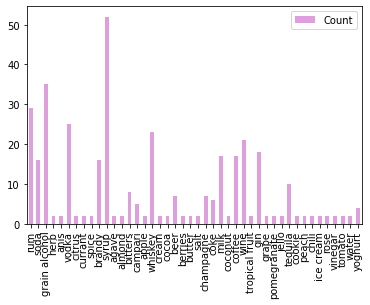

In [16]:
# Explore the ingredient distribution
df_count = pd.DataFrame(df.nunique(),columns=['Count'])
df_count.plot(kind='bar',color='plum')

### Prepare data for model

In [64]:
# separate numerical and categorical features

num_features = ['rum', 'grain alcohol', 'vodka', 'brandy', 'bitters',
       'campari', 'whiskey', 'beer', 'soda', 'syrup', 'champagne', 'coke', 'milk', 'coffee',
       'wine', 'gin', 'tequila', 'yoghurt']

cat_features = []
for col in df.columns:
    if col not in num_features:
        cat_features.append(col)

print(cat_features)

['herb', 'anis', 'citrus', 'currant', 'spice', 'agave', 'almond', 'apple', 'cream', 'cocoa', 'berries', 'butter', 'salt', 'coconut', 'tropical fruit', 'grape', 'pomegranate', 'jello', 'cookie', 'peach', 'chili', 'ice cream', 'rose', 'vinegar', 'tomato', 'water']


In [65]:
df_num_1 = df.drop(columns=cat_features)
df_index = pd.DataFrame(df.reset_index()['DrinkName'])
df_index.head()

,DrinkName
0,A1
1,ABC
2,Ace
3,Adam
4,AT&T


In [66]:
# scale standardization of numerical values
df_num = pd.DataFrame(StandardScaler().fit_transform(df_num_1),columns=num_features)
df_num = df_num.join(df_index).set_index('DrinkName')
df_num.head()

,rum,grain alcohol,vodka,brandy,bitters,campari,whiskey,beer,soda,syrup,champagne,coke,milk,coffee,wine,gin,tequila,yoghurt
DrinkName,,,,,,,,,,,,,,,,,,
A1,-0.324737,-0.128867,-0.076612,-0.147510,2.119802,0.213987,-0.265669,-0.117669,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,3.127088,-0.152416,-0.130954
ABC,-0.324737,-0.128867,-0.076612,-0.147510,0.266941,-0.203834,-0.265669,-0.117669,-0.035949,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,-0.425141,-0.152416,-0.130954
Ace,-0.324737,-0.128867,-0.076612,-0.147510,-0.262448,-0.018136,-0.265669,-0.117669,-0.245859,-0.15303,-0.130701,-0.080101,0.054916,-0.231681,-0.172977,3.634549,-0.152416,-0.130954
Adam,1.159602,-0.128867,-0.076612,-0.147510,-0.262448,-0.162485,-0.265669,-0.117669,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,-0.425141,-0.152416,-0.130954
AT&T,-0.324737,0.751432,-0.076612,0.027475,-0.262448,-0.203834,-0.265669,-0.117669,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,0.928089,-0.152416,-0.130954


In [84]:
df_cat = df.drop(columns=num_features)
df_std = df_cat.join(df_num)
df_w_name = df_std.copy()
df_w_name = df_std.reset_index()
df_w_name.head()

,DrinkName,herb,anis,citrus,currant,spice,agave,almond,apple,cream,...,soda,syrup,champagne,coke,milk,coffee,wine,gin,tequila,yoghurt
0,A1,0,0,1,0,0,0,0,0,0,...,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,3.127088,-0.152416,-0.130954
1,ABC,0,0,0,0,0,0,1,0,1,...,-0.035949,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,-0.425141,-0.152416,-0.130954
2,Ace,0,0,0,0,0,0,0,0,1,...,-0.245859,-0.15303,-0.130701,-0.080101,0.054916,-0.231681,-0.172977,3.634549,-0.152416,-0.130954
3,Adam,0,0,0,0,0,0,0,0,0,...,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,-0.425141,-0.152416,-0.130954
4,AT&T,0,0,0,0,0,0,0,0,0,...,-0.245859,-0.15303,-0.130701,-0.080101,-0.172073,-0.231681,-0.172977,0.928089,-0.152416,-0.130954


In [54]:
# generate similarity matrix
distance_matrix = gower.gower_matrix(df_std)
#create complete linkage
Zd = linkage(distance_matrix,method='complete') 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


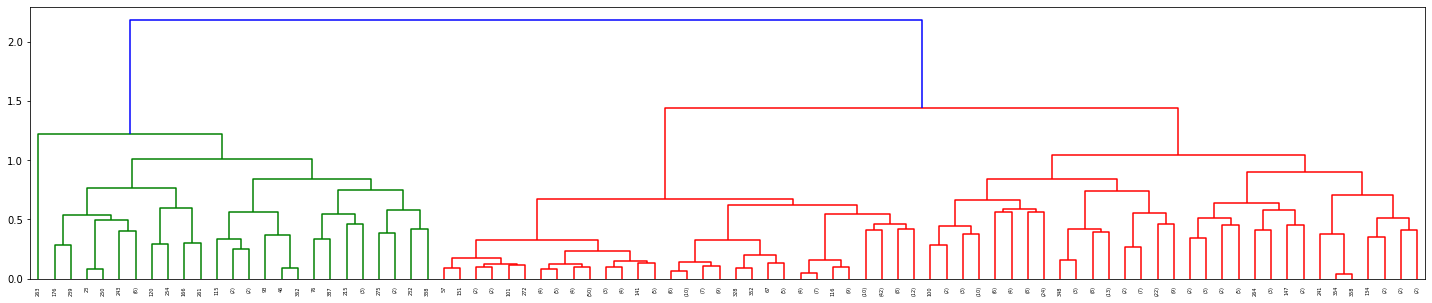

In [55]:
# hierarchical clustering visulization
fig,axs = plt.subplots(1,1,figsize=(25,5))
dn = dendrogram(Zd, truncate_mode='level',p=6,show_leaf_counts=True,ax=axs)

In [85]:
# find similar cocktails
def find_similar(i,k):
    n_similar = gower.gower_topn(df_std.iloc[i:i+1,:],df_std,n=k)
    similar_cocktails = []
    distance = list(n_similar['values'])
    for i in n_similar['index']:
        similar_cocktails.append(df_w_name.iloc[i,0])
    similar_cocktails = similar_cocktails[1:]
    return similar_cocktails

df_similar = pd.DataFrame()
for i,row in df_w_name.iterrows():
    df_similar[row['DrinkName']] = find_similar(i,6)
df_similar_t = df_similar.T
df_similar_t.columns = ['top 1','top 2','top 3','top 4','top 5']

In [92]:
# user input the target cocktail
find_similar_cocktail = input("What cocktails/drinks is similar to ...? Just enter a cocktail/drink name: ")

What cocktails/drinks is similar to ...? Just enter a cocktail/drink name: A1


In [93]:
print(df_similar_t.loc[find_similar_cocktail])

top 1       Gin Daisy
top 2          Boxcar
top 3       Jitterbug
top 4    Monkey Gland
top 5        Gin Sour
Name: A1, dtype: object
